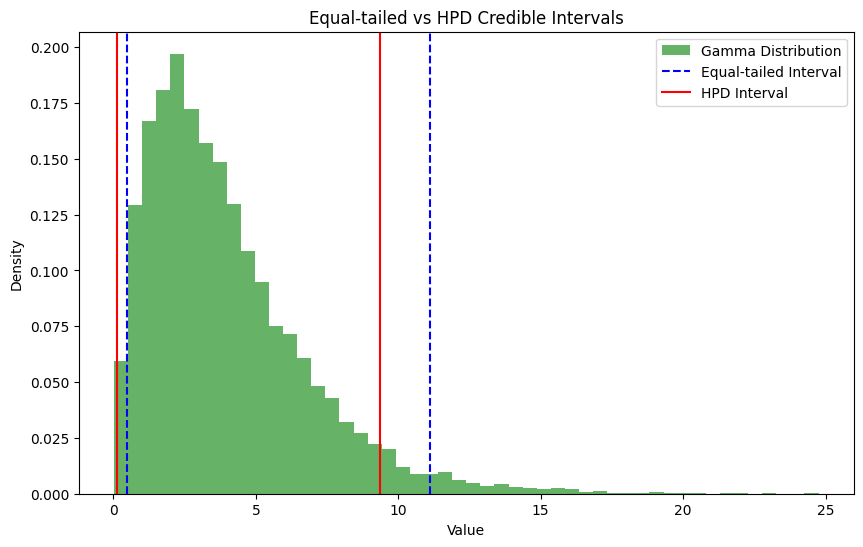

Equal-tailed 95% credible interval: [0.47709072106986716, 11.125341705479114]
HPD 95% credible interval: [0.11736565937328666, 9.347538797431424]


In [2]:
# HPD interval vs. Equal Tailed Credible Interval
# Case: Skewed Distribution

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
#import pymc3 as pm

def hpd_interval(data, alpha):
    """Calculate the HPD interval."""
    sorted_data = np.sort(data)
    ci_idx_inc = int(np.floor(alpha * len(sorted_data)))
    n_intervals = len(sorted_data) - ci_idx_inc
    interval_width = sorted_data[ci_idx_inc:] - sorted_data[:n_intervals]
    min_idx = np.argmin(interval_width)
    hpd_min = sorted_data[min_idx]
    hpd_max = sorted_data[min_idx + ci_idx_inc]
    return hpd_min, hpd_max

# Parameters for the skewed distribution (gamma distribution)
shape, scale = 2., 2.  # gamma distribution shape and scale
data = np.random.gamma(shape, scale, 10000)

# Calculate equal-tailed credible interval
alpha = 0.95
lower_equal_tailed = np.percentile(data, (1 - alpha) / 2 * 100)
upper_equal_tailed = np.percentile(data, (1 + alpha) / 2 * 100)

# Calculate HPD interval
hpd_min, hpd_max = hpd_interval(data, alpha)

# Plot the distribution and intervals
plt.figure(figsize=(10, 6))
plt.hist(data, bins=50, density=True, alpha=0.6, color='g', label='Gamma Distribution')
plt.axvline(lower_equal_tailed, color='blue', linestyle='--', label='Equal-tailed Interval')
plt.axvline(upper_equal_tailed, color='blue', linestyle='--')
plt.axvline(hpd_min, color='red', linestyle='-', label='HPD Interval')
plt.axvline(hpd_max, color='red', linestyle='-')
plt.title('Equal-tailed vs HPD Credible Intervals')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

# Print intervals
print(f"Equal-tailed 95% credible interval: [{lower_equal_tailed}, {upper_equal_tailed}]")
print(f"HPD 95% credible interval: [{hpd_min}, {hpd_max}]")
